In [1]:
import pandas as pd
from sklearn.impute import  SimpleImputer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

In [2]:
# read CSV file to dataframe
df = pd.read_csv("D:\\Career\\pythonProject\\variable_imapct\\dataset.csv")
df.head(5)
# df_gender = pd.get_dummies(df['sex'])
#df_region = pd.get_dummies(df['region'])
df['sex'].replace(['male', 'female'],[1, 0], inplace=True)
df['smoker'].replace(['yes', 'no'],[1, 0], inplace=True)
df['region'].replace(['northeast', 'northwest','southeast','southwest'],[0,1,2,3], inplace=True)

# df = pd.concat([df, df_gender], axis=1)
# df = pd.concat([df,df_region],axis = 1)
# df_new = df.drop(labels=['sex','region'], axis='columns')
print(df.isnull().sum().sort_values(ascending=False)/df.shape[0])

age         0.002990
bmi         0.001495
sex         0.000000
children    0.000000
smoker      0.000000
region      0.000000
charges     0.000000
dtype: float64


In [3]:
si=SimpleImputer(missing_values = np.nan, strategy="median")
si.fit(df[['age', 'bmi']])
#Filling missing data with median
df[['age', 'bmi']] = si.transform(df[['age', 'bmi']])

After filling null values :
age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64


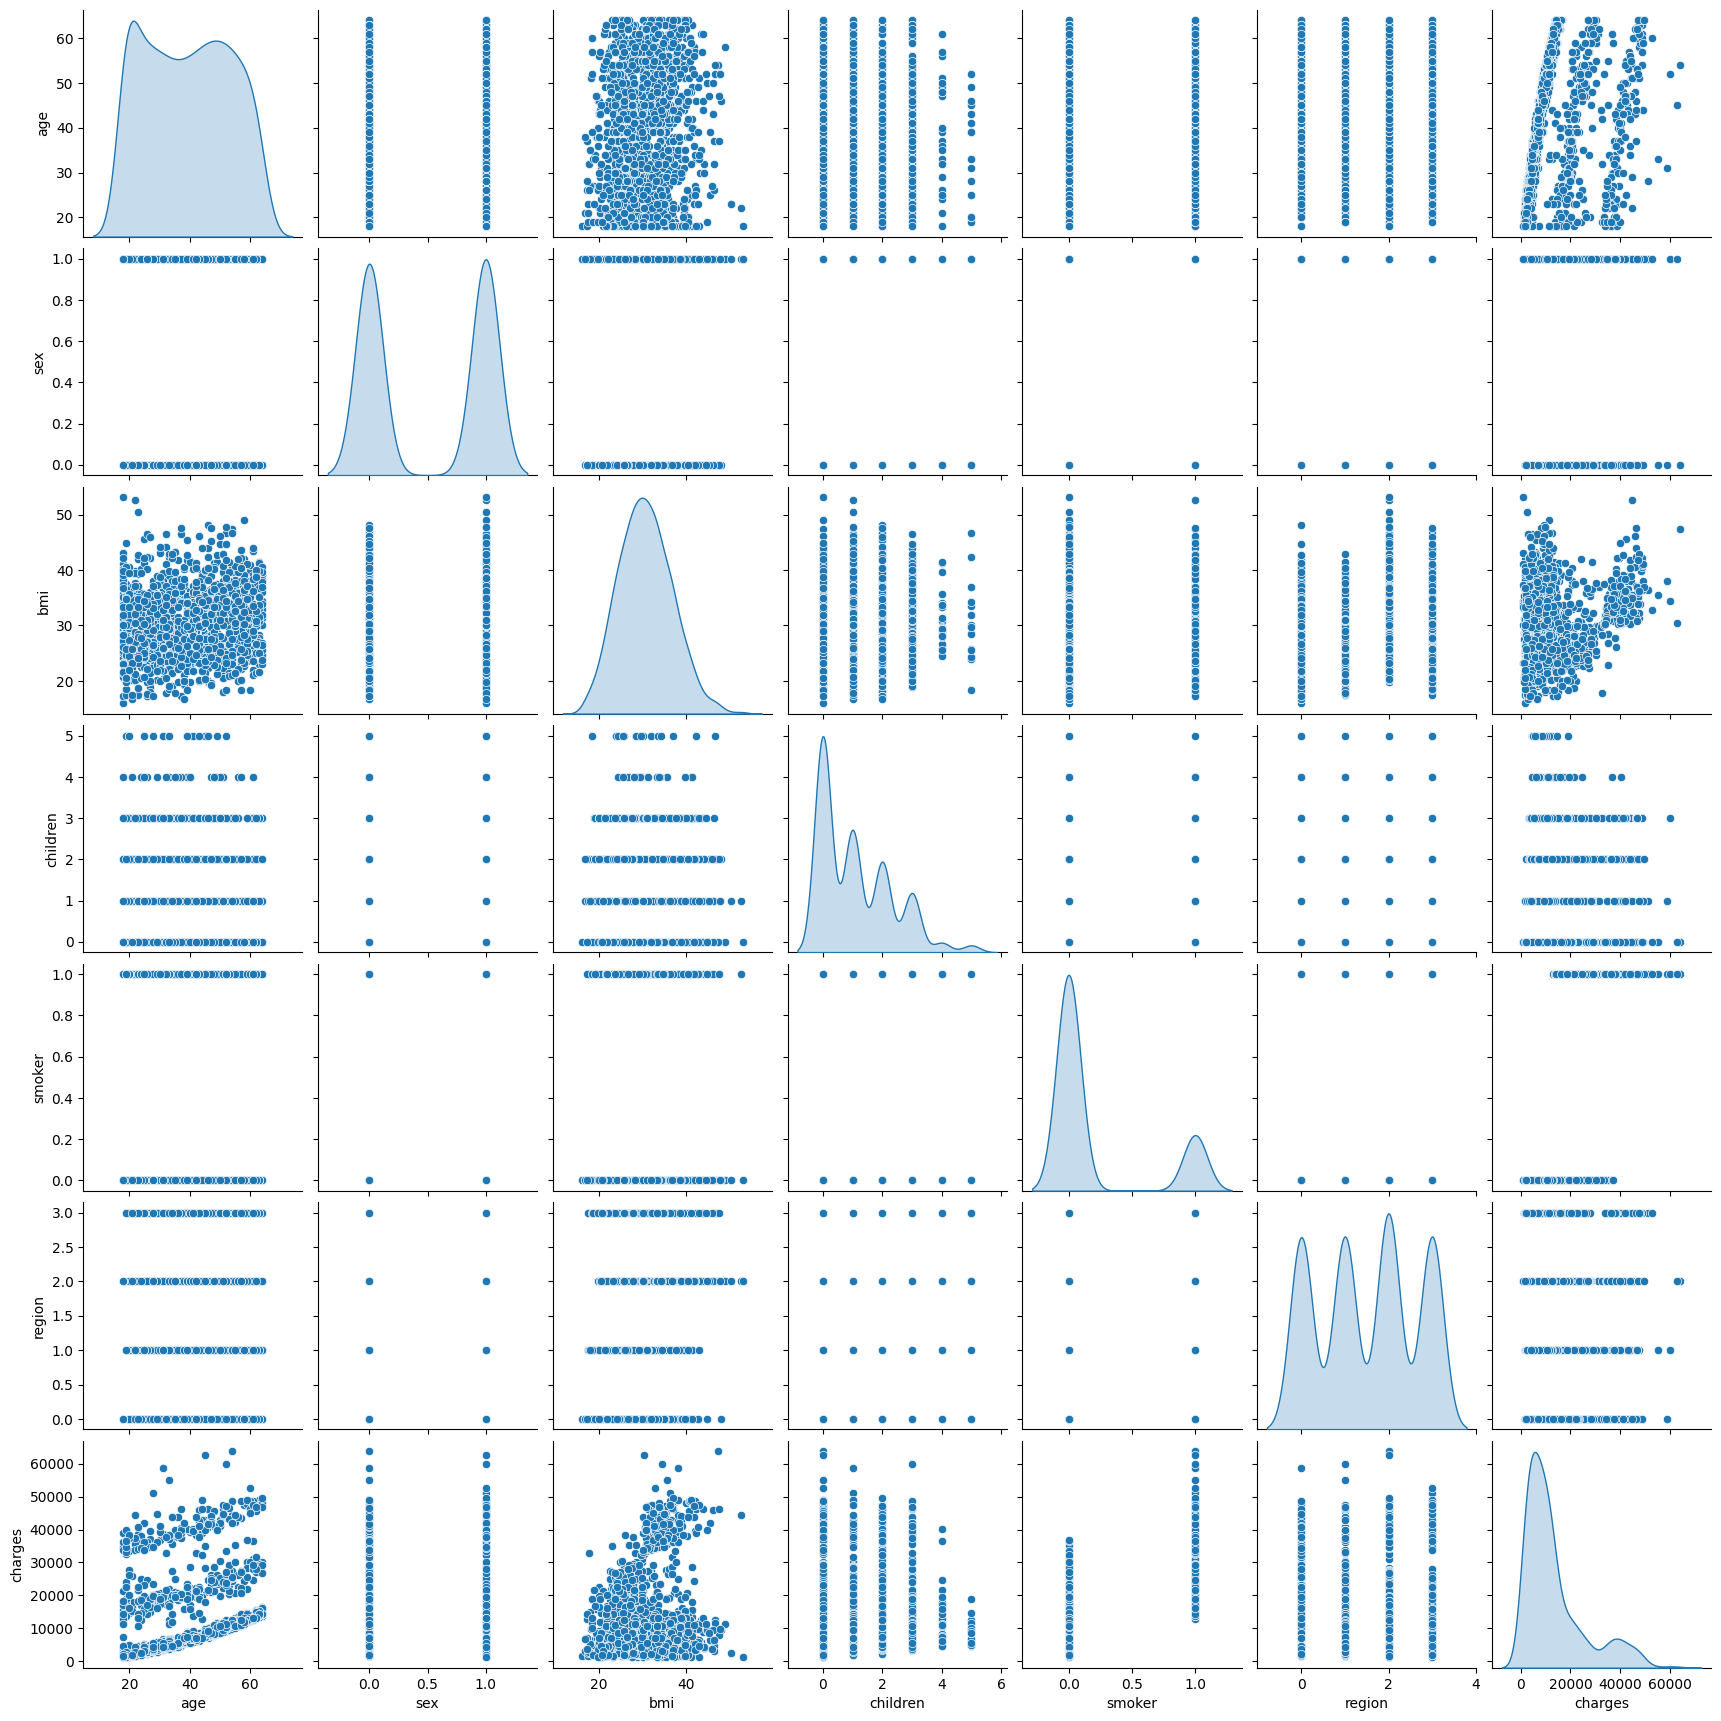

In [4]:
print("After filling null values :")
print(df.isnull().sum().sort_values(ascending=False)/df.shape[0])
sns.pairplot(data=df, diag_kind='kde')

<Axes: >

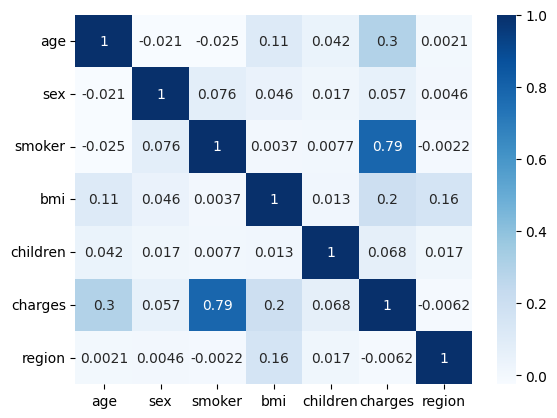

In [5]:
df.head(3)
sns.heatmap(df[['age','sex','smoker','bmi','children','charges','region']].corr(), cmap='Blues', annot=True)


* Above we can see the correlation between smoker and charges -- 79% we could remove any of the variables

In [6]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19.0,0,27.900,0,1,3,16884.92400
1,18.0,1,33.770,1,0,2,1725.55230
2,28.0,1,33.000,3,0,2,4449.46200
3,33.0,1,22.705,0,0,1,21984.47061
4,32.0,1,28.880,0,0,1,3866.85520


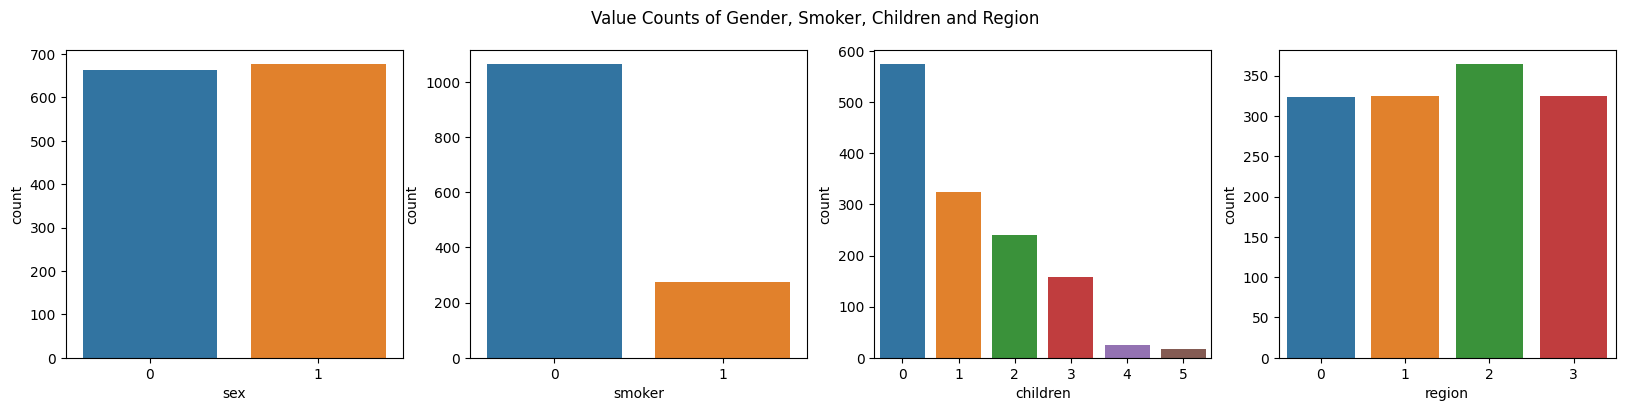

In [7]:
fig, ax2 = plt.subplots(1,4,  figsize=(20,4))
fig.suptitle('Value Counts of Gender, Smoker, Children and Region')
sns.countplot(ax=ax2[0], x=df.sex)
sns.countplot(ax=ax2[1], x=df.smoker)
sns.countplot(ax=ax2[2], x=df.children)
sns.countplot(ax=ax2[3], x=df.region)
plt.show()

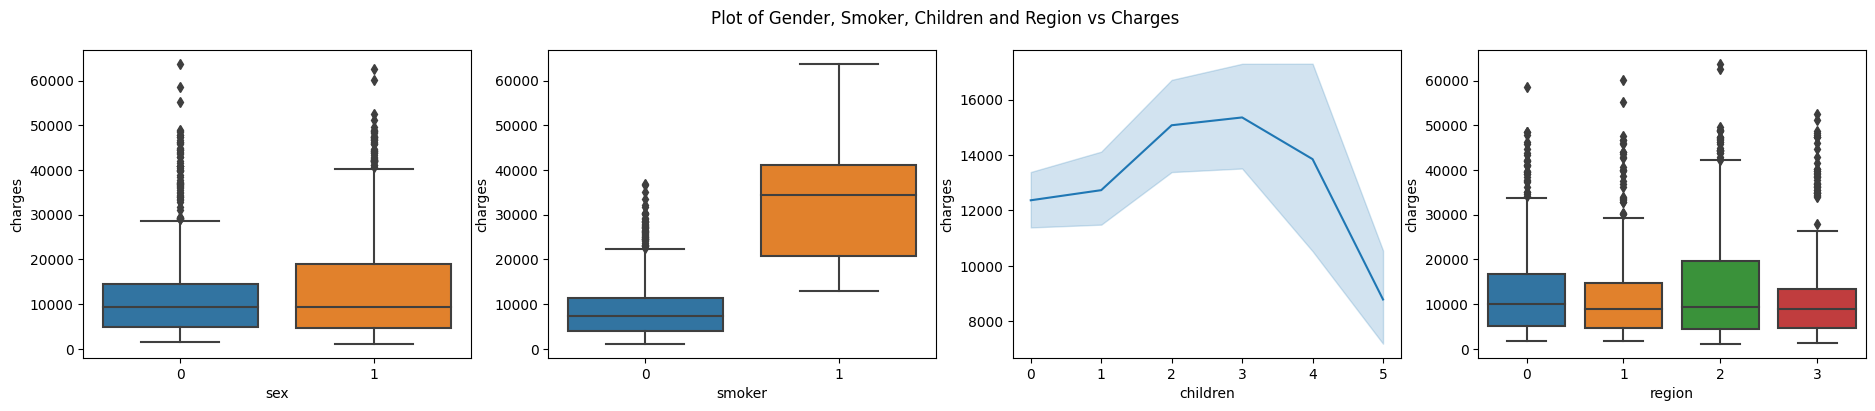

In [8]:
fig, ax2 = plt.subplots(1,4,  figsize=(23,4))
fig.suptitle('Plot of Gender, Smoker, Children and Region vs Charges',)
sns.boxplot(ax=ax2[0], x=df.sex, y=df.charges)
sns.boxplot(ax=ax2[1], x=df.smoker, y=df.charges)
sns.lineplot(ax=ax2[2], x=df.children, y=df.charges)
sns.boxplot(ax=ax2[3], x=df.region, y=df.charges)
plt.show()

In [9]:
X=df.drop(["charges"], axis=1)
vif = pd.DataFrame()
vif["features"] = X.columns
print(vif)

   features
0       age
1       sex
2       bmi
3  children
4    smoker
5    region


In [10]:
vif["vif_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [11]:
print(vif)

   features  vif_Factor
0       age    7.550903
1       sex    2.001056
2       bmi   10.372405
3  children    1.801241
4    smoker    1.256837
5    region    2.924544


* In general, we should aim for the VIF of less than 10 for the independent variables, bmi is only bit more so we can still consider it. All the variables look independent
